In [1]:

from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-07-02 09:18:38--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.17.46
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.17.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  66.1MB/s    in 24s     

2020-07-02 09:19:03 (64.4 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [3]:

!gunzip /content/GoogleNews-vectors-negative300.bin.gz

In [4]:
import pandas as pd
import numpy as np
import pickle
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from string import punctuation
from gensim.models import KeyedVectors


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [6]:
style.use('seaborn-poster')
style.use('ggplot')

LOADING TRAIN TEST VALIDATION IMAGE NUMPY ARRAY

In [7]:
with open('/content/gdrive/My Drive/Movie_genre_prediction_dataset/train_np_imgs_norm','rb') as f:
  X_img_train=pickle.load(f)
X_img_train.shape

(28035, 115, 75, 3)

In [8]:
with open('/content/gdrive/My Drive/Movie_genre_prediction_dataset/test_np_imgs_norm','rb') as f:
  X_img_test =pickle.load(f)
X_img_test .shape

(7787, 115, 75, 3)

In [9]:
with open('/content/gdrive/My Drive/Movie_genre_prediction_dataset/val_np_img_norm','rb') as f:
  X_img_val =pickle.load(f)
X_img_val .shape

(3115, 115, 75, 3)

LOAD ALL DATASET

In [10]:
dataset = pd.read_csv("/content/gdrive/My Drive/Movie_genre_prediction_dataset/dataset_mod.csv")
train = pd.read_csv("/content/gdrive/My Drive/Movie_genre_prediction_dataset/train_data.csv")
test = pd.read_csv("/content/gdrive/My Drive/Movie_genre_prediction_dataset/test_data.csv")
val = pd.read_csv("/content/gdrive/My Drive/Movie_genre_prediction_dataset/val_data.csv")

In [11]:
dataset['genre_list']=dataset['genre_list'].apply(lambda x:ast.literal_eval(x))
train['genre_list']=train['genre_list'].apply(lambda x:ast.literal_eval(x))
test['genre_list']=test['genre_list'].apply(lambda x:ast.literal_eval(x))
val['genre_list']=val['genre_list'].apply(lambda x:ast.literal_eval(x))

Let's now check distrubution of Genre across movie no of genre per movie

In [12]:
genre={}
for value in train['genre_list']:
  if len(value) in genre:
    genre[len(value)]+=1
  else:
    genre[len(value)]=1

genre

{1: 9511, 2: 9504, 3: 6285, 4: 2133, 5: 493, 6: 95, 7: 12, 8: 2}

In [13]:
genre={}
for value in train['genre_list']:
  if len(value) in genre:
    genre[len(value)]+=1
  else:
    genre[len(value)]=1

genre

{1: 9511, 2: 9504, 3: 6285, 4: 2133, 5: 493, 6: 95, 7: 12, 8: 2}

In [14]:
val

,Unnamed: 0,Unnamed: 0.1,original_title,overview,id,genres,genre_list,poster_paths
0,24923,27523,Rudolph the Red-Nosed Reindeer,The rare original version of the classic under...,81294,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...","[Animation, Family, Fantasy, Music]",/content/gdrive/My Drive/Movie_genre_predictio...
1,19634,21294,Gunman's Walk,"Tab Hunter plays Ed Hackett, the son of gunsli...",42871,"[{'id': 37, 'name': 'Western'}]",[Western],/content/gdrive/My Drive/Movie_genre_predictio...
2,34394,39619,Author: The JT LeRoy Story,New York magazine’s October 2005 issue sent sh...,373348,"[{'id': 99, 'name': 'Documentary'}]",[Documentary],/content/gdrive/My Drive/Movie_genre_predictio...
3,38502,44877,Votez Bougon,NaN,430058,"[{'id': 35, 'name': 'Comedy'}]",[Comedy],/content/gdrive/My Drive/Movie_genre_predictio...
4,17964,19303,Little Birds,Lily and Alison face a life-changing event aft...,75595,"[{'id': 18, 'name': 'Drama'}]",[Drama],/content/gdrive/My Drive/Movie_genre_predictio...
...,...,...,...,...,...,...,...,...
3110,34607,39880,애인,"Having first met today, the man and woman dash...",142093,"[{'id': 10749, 'name': 'Romance'}]",[Romance],/content/gdrive/My Drive/Movie_genre_predictio...
3111,9986,10468,Living 'til the End,Told by a psychic of his imminent death on his...,53935,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...","[Drama, Romance]",/content/gdrive/My Drive/Movie_genre_predictio...
3112,33448,38454,The Kingdom of Solomon,"Solomon, Prophet and the King, has asked God t...",153779,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...","[Drama, History]",/content/gdrive/My Drive/Movie_genre_predictio...
3113,27174,30268,ゼロの焦点,"One week into newlywed Teiko Uhara's marriage,...",115572,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...","[Drama, Crime, Mystery, Thriller]",/content/gdrive/My Drive/Movie_genre_predictio...


In [15]:
genre={}
for value in val['genre_list']:
  if len(value) in genre:
    genre[len(value)]+=1
  else:
    genre[len(value)]=1

genre

{1: 1081, 2: 1054, 3: 697, 4: 227, 5: 49, 6: 6, 7: 1}

now making one hot vector of all labels

In [16]:
dataset['genre_list'].value_counts

<bound method IndexOpsMixin.value_counts of 0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
38933               [Science Fiction]
38934        [Drama, Action, Romance]
38935                 [Drama, Family]
38936                         [Drama]
38937       [Action, Drama, Thriller]
Name: genre_list, Length: 38938, dtype: object>

In [17]:
mlb=MultiLabelBinarizer()
mlb.fit(dataset['genre_list'].to_list())
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller',
       'War', 'Western'], dtype=object)

In [18]:
transformed_labels=mlb.fit_transform(dataset['genre_list'].tolist())
transformed_labels.shape

(38938, 18)

In [19]:
train_labels = mlb.transform(train['genre_list'].tolist())
train_labels.shape

(28035, 18)

In [20]:
test_labels = mlb.transform(test['genre_list'].tolist())
test_labels.shape

(7787, 18)

In [21]:
val_labels = mlb.transform(val['genre_list'].tolist())
val_labels.shape

(3115, 18)

text cleaning

In [26]:
stop=stopwords.words('english')
lemmatizer=WordNetLemmatizer()

def clean_text(text):
  text=text.translate(str.maketrans('', '', punctuation))  #   removes all punctuation
  text=text.lower().strip()
  text = ' '.join([i if i not in stop and i.isalpha() else '' for i in text.lower().split()])
  text=' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(text)])
  text=re.sub(r"\s{2,}"," ",text)         #filteration of length
  return text

train['overview']=train['overview'].astype(str)
test['overview'] = test['overview'].astype(str)
val['overview'] = val['overview'].astype(str)

In [27]:
train['overview']=train['overview'].apply(lambda x:clean_text(x))
test['overview']=test['overview'].apply(lambda x:clean_text(x))
val['overview']=val['overview'].apply(lambda x:clean_text(x))

In [29]:
dataset['overview']=dataset['overview'].astype(str)
dataset['overview']=dataset['overview'].apply(lambda x:clean_text(x))

Lets play with Keras

In [61]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras.layers import Embedding, LSTM, Dropout, Dense, Input, Bidirectional, Flatten, Conv2D, MaxPooling2D, concatenate, Conv1D, MaxPooling1D
import keras.backend as K
from keras.optimizers import Adam, RMSprop
from keras.layers import Bidirectional
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping

as per law we will fit our tokenizer with whole dataset and tranform with train,test,val

so that all word is counted

In [34]:
MAX_NB_WORDS=50000
MAX_SEQUENCE_LENGTH=dataset['overview'].map(len).max()
EMBEDDING_DIM =300

In [35]:
MAX_SEQUENCE_LENGTH,MAX_NB_WORDS,EMBEDDING_DIM 

(868, 50000, 300)

In [37]:
tokenizer=Tokenizer(num_words=MAX_NB_WORDS,lower=True)
tokenizer.fit_on_texts(dataset['overview'].values)
word_index=tokenizer.word_index

In [38]:
word_index

{'life': 1,
 'one': 2,
 'find': 3,
 'young': 4,
 'film': 5,
 'new': 6,
 'love': 7,
 'man': 8,
 'two': 9,
 'get': 10,
 'story': 11,
 'family': 12,
 'woman': 13,
 'friend': 14,
 'world': 15,
 'year': 16,
 'take': 17,
 'time': 18,
 'girl': 19,
 'father': 20,
 'go': 21,
 'day': 22,
 'make': 23,
 'back': 24,
 'wife': 25,
 'come': 26,
 'way': 27,
 'meet': 28,
 'must': 29,
 'help': 30,
 'war': 31,
 'first': 32,
 'set': 33,
 'town': 34,
 'home': 35,
 'old': 36,
 'son': 37,
 'school': 38,
 'daughter': 39,
 'try': 40,
 'mother': 41,
 'begin': 42,
 'fall': 43,
 'becomes': 44,
 'work': 45,
 'death': 46,
 'boy': 47,
 'people': 48,
 'three': 49,
 'group': 50,
 'turn': 51,
 'child': 52,
 'brother': 53,
 'city': 54,
 'soon': 55,
 'also': 56,
 'want': 57,
 'murder': 58,
 'return': 59,
 'together': 60,
 'american': 61,
 'become': 62,
 'men': 63,
 'start': 64,
 'end': 65,
 'night': 66,
 'house': 67,
 'police': 68,
 'secret': 69,
 'husband': 70,
 'small': 71,
 'movie': 72,
 'local': 73,
 'job': 74,
 'star

In [40]:
len(word_index)   # no of unique words

72858

In [42]:
def get_embedding_matrix():
  word2vecDict=KeyedVectors.load_word2vec_format("/content/GoogleNews-vectors-negative300.bin", binary=True)
  embed_size =300
  embeddings_index=dict()
  for word in word2vecDict.wv.vocab:
    embeddings_index[word]=word2vecDict.word_vec(word)
  print("loaded word 2 vec")
  embedding_matrix=1*np.random.randn(len(word_index)+1,embed_size)
  embeddedCount=0
  for word,i in word_index.items():
    i-=1
    embedding_vector=embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i]=embedding_vector
      embeddedCount+=1
  print("total embedded:", embeddedCount, "common words")
        
  del(embeddings_index)
        
  return embedding_matrix
  
   

In [43]:
word2vec_embedding_matrix = get_embedding_matrix()

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


loaded word 2 vec
total embedded: 34865 common words


Now transfrom and making ready text ready

In [47]:
X_text_train=tokenizer.texts_to_sequences(train['overview'].values)

X_text_train=pad_sequences(X_text_train,maxlen=MAX_SEQUENCE_LENGTH)

print("shape of input tensor",X_text_train.shape)

shape of input tensor (28035, 868)


In [110]:
type(train['overview'])

pandas.core.series.Series

In [48]:
X_text_test =tokenizer.texts_to_sequences(test['overview'].values)

X_text_test =pad_sequences(X_text_test,maxlen=MAX_SEQUENCE_LENGTH)

print("shape of test tensor",X_text_test.shape)

shape of test tensor (7787, 868)


In [49]:
X_text_val  =tokenizer.texts_to_sequences(val['overview'].values)

X_text_val  =pad_sequences(X_text_val ,maxlen=MAX_SEQUENCE_LENGTH)

print("shape of test tensor",X_text_val .shape)

shape of test tensor (3115, 868)


![alt text](https://miro.medium.com/max/1400/1*b4MoSHYfA9U8nPFTXAb4xg.png)

The images are input to a CNN. The CNN consists of consecutive 2D convolutional and max-pooling layers. The output of the last max-pooling layer is flattened and fed into a fully connected layer.


The fully connected layers of the LSTM and CNN then concatenated and fed forward till the final fully connected layer. The last layer has an output size of 18, each correlating to one genre.

In [51]:
  print(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3])

115 75 3


In [82]:
def compile_model1(embedding_matrix):
  lstm_input = Input(shape=(MAX_SEQUENCE_LENGTH,))
  x = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], mask_zero=True, input_length=MAX_SEQUENCE_LENGTH, trainable=False)(lstm_input)
  x = Dropout(0.3)(x)
  x = Bidirectional(LSTM(128, return_sequences = True))(x)
  x = Dropout(0.3)(x)
  x = LSTM(128)(x)
  x = Dropout(0.3)(x)
  lstm_out = Dense(18, activation = 'relu')(x)

 
  cnn_input = Input(shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))
  y = Conv2D(32, (3, 3), activation='relu', input_shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))(cnn_input)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(64, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(128, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(128, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Flatten()(y)
  y = Dropout(0.3)(y)
  cnn_out = Dense(512, activation='relu')(y)

  concat_inp = concatenate([cnn_out, lstm_out])
  z = Dense(256, activation='relu')(concat_inp)
  z = Dropout(0.3)(z)
  z = Dense(128, activation='relu')(z)
  z = Dropout(0.3)(z)
  output = Dense(train_labels.shape[1], activation='sigmoid')(z)

  model = Model(inputs=[cnn_input, lstm_input], outputs=[output])
  adam = Adam(lr=0.001, decay=1e-5)
  
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

In [83]:
word2vec_model = compile_model1(word2vec_embedding_matrix)
word2vec_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           (None, 115, 75, 3)   0                                            
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 113, 73, 32)  896         input_27[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_41 (MaxPooling2D) (None, 56, 36, 32)   0           conv2d_42[0][0]                  
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 54, 34, 64)   18496       max_pooling2d_41[0][0]           
___________________________________________________________________________________________

In [86]:
es = EarlyStopping(patience=5)
csv_logger = CSVLogger('/content/gdrive/My Drive/Movie_genre_prediction_dataset/model_history_log_model_lstm.csv', append=True)
check_point = ModelCheckpoint(filepath='/content/gdrive/My Drive/Movie_genre_prediction_dataset/best_lstm_model_todate', save_best_only=True, save_weights_only=True)

In [87]:
word2vec_multi_modal_model = word2vec_model.fit([X_img_train, X_text_train], train_labels, batch_size=256, epochs=20, 
                            validation_data=([X_img_val, X_text_val], val_labels), callbacks = [es, csv_logger, check_point])

Train on 28035 samples, validate on 3115 samples
Epoch 1/20
28035/28035 [==============================] - 1410s 50ms/step - loss: 0.3465 - accuracy: 0.8714 - val_loss: 0.3034 - val_accuracy: 0.8851
Epoch 2/20
28035/28035 [==============================] - 1414s 50ms/step - loss: 0.3104 - accuracy: 0.8842 - val_loss: 0.2943 - val_accuracy: 0.8900
Epoch 3/20
28035/28035 [==============================] - 1384s 49ms/step - loss: 0.3030 - accuracy: 0.8867 - val_loss: 0.2903 - val_accuracy: 0.8900
Epoch 4/20
28035/28035 [==============================] - 1407s 50ms/step - loss: 0.2989 - accuracy: 0.8876 - val_loss: 0.2874 - val_accuracy: 0.8908
Epoch 5/20
28035/28035 [==============================] - 1386s 49ms/step - loss: 0.2963 - accuracy: 0.8884 - val_loss: 0.2842 - val_accuracy: 0.8921
Epoch 6/20
28035/28035 [==============================] - 1414s 50ms/step - loss: 0.2911 - accuracy: 0.8895 - val_loss: 0.2797 - val_accuracy: 0.8932
Epoch 7/20
28035/28035 [===========================

In [89]:
word2vec_model.save('/content/gdrive/My Drive/Movie_genre_prediction_dataset/base_model_word2vec_lstm.h5')

In [90]:
word2vec_model = load_model("/content/gdrive/My Drive/Movie_genre_prediction_dataset/base_model_word2vec_lstm.h5")

In [91]:
def plot_loss(history):
  plt.title('Loss')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend(['training loss', 'validation loss'], loc='upper right')
  plt.show()

def plot_acc(history):
  plt.title('Accuracy')
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
  plt.show()

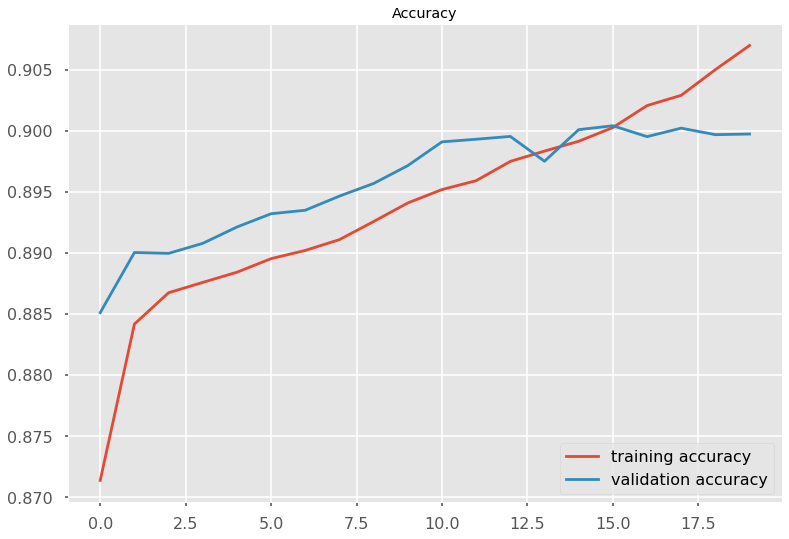

In [92]:
plot_acc(word2vec_multi_modal_model)

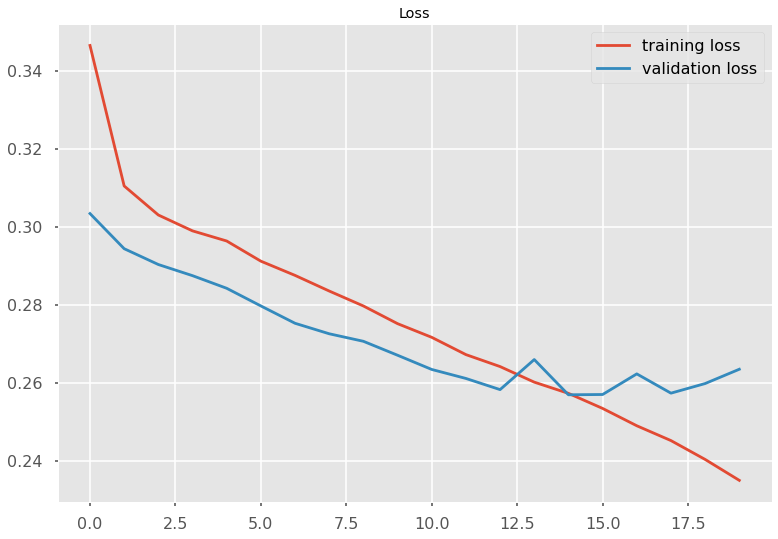

In [93]:
plot_loss(word2vec_multi_modal_model)

In [94]:
loss, acc = word2vec_model.evaluate([X_img_test, X_text_test], test_labels, batch_size=256)
print("word2vec model:", loss, acc)

7787/7787 [==============================] - 56s 7ms/step
word2vec model: 0.2710250203349524 0.8947462439537048


In [95]:
out = word2vec_model.predict([X_img_test, X_text_test], batch_size=256)

Checking accuracy of prediction by ROC AUC

In [96]:
roc_auc = roc_auc_score(test_labels, out)
print(roc_auc)

0.7775318628030008


Taking Threshold of 50 %

In [97]:
y_pred = np.zeros(out.shape)
y_pred[out>0.5]=1
y_pred = np.array(y_pred)

In [98]:
hl = hamming_loss(test_labels,y_pred)
score = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels,y_pred, average = 'samples')
recall = recall_score(test_labels,y_pred, average = 'samples')
f1 = f1_score(test_labels,y_pred, average = 'samples')
print("Hamming loss:", hl)
print("score:", score)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1)

Hamming loss: 0.10525377052922963
score: 0.16437652497752664
Precision: 0.5285625615341809
Recall: 0.3911136998783075
F1_score: 0.41717667418836035


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
preds = np.transpose(y_pred)
labels = np.transpose(test_labels)

Action
accuracy: 0.8434570437909336 precision: 0.526984126984127 recall: 0.1343042071197411 f1: 0.21405544809800126


<Figure size 921.6x633.6 with 0 Axes>

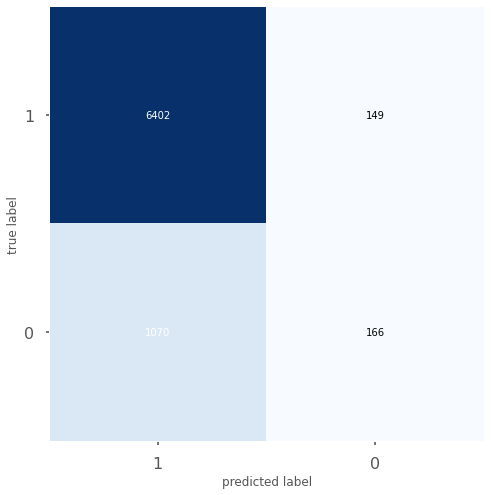

Adventure
accuracy: 0.9129318094259663 precision: 0.5769230769230769 recall: 0.021994134897360705 f1: 0.04237288135593221


<Figure size 921.6x633.6 with 0 Axes>

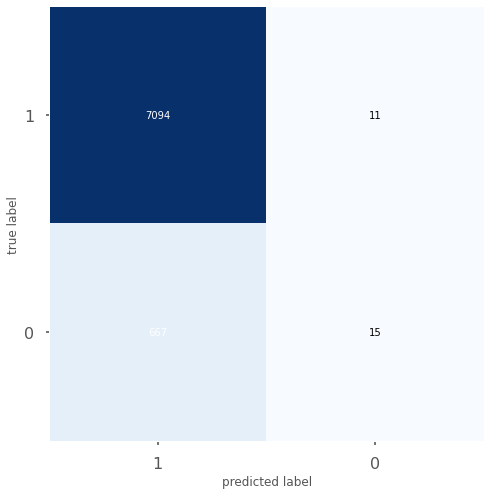

Animation
accuracy: 0.9573648388339541 precision: 0.4918918918918919 recall: 0.2765957446808511 f1: 0.35408560311284043


<Figure size 921.6x633.6 with 0 Axes>

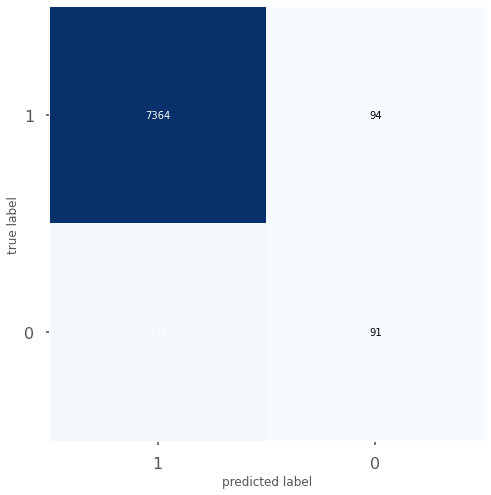

Comedy
accuracy: 0.7289071529472197 precision: 0.5663326653306613 recall: 0.5786240786240786 f1: 0.5724123961920194


<Figure size 921.6x633.6 with 0 Axes>

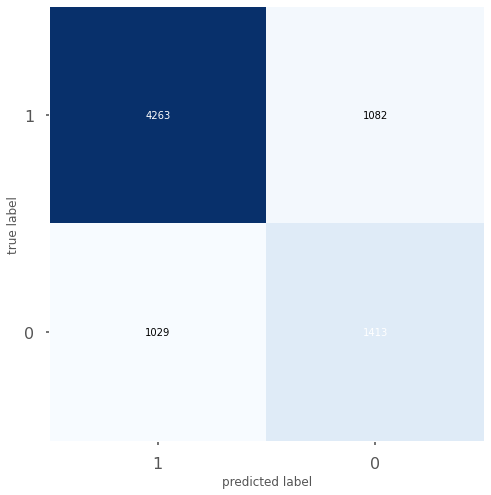

Crime
accuracy: 0.8932836779247464 precision: 0.47019867549668876 recall: 0.08637469586374696 f1: 0.1459403905447071


<Figure size 921.6x633.6 with 0 Axes>

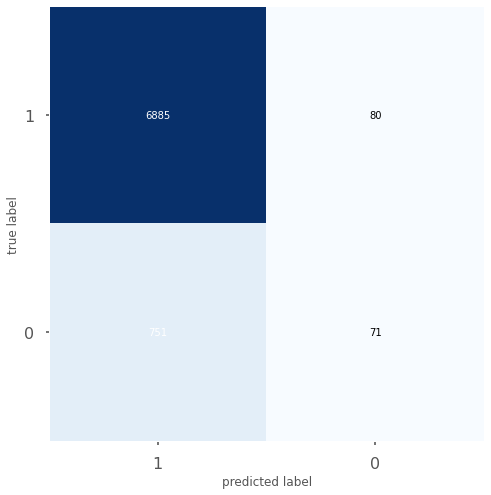

Documentary
accuracy: 0.947733401823552 precision: 0.7475728155339806 recall: 0.4125 f1: 0.5316455696202531


<Figure size 921.6x633.6 with 0 Axes>

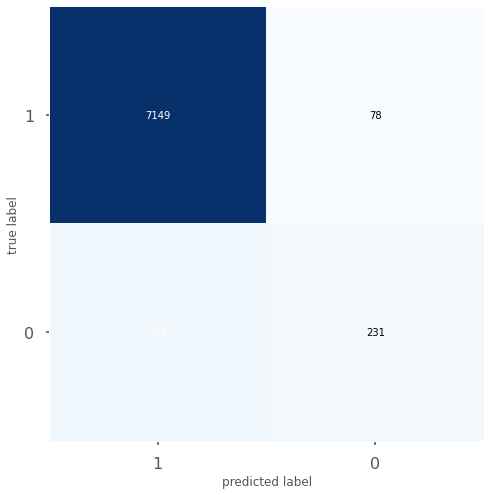

Drama
accuracy: 0.6562219083087196 precision: 0.635017866258295 recall: 0.6661311914323963 f1: 0.6502025349536129


<Figure size 921.6x633.6 with 0 Axes>

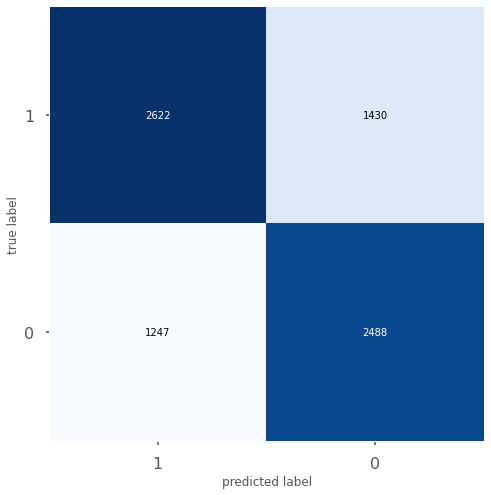

Family
accuracy: 0.934377809169128 precision: 0.4729064039408867 recall: 0.192 f1: 0.2731152204836415


<Figure size 921.6x633.6 with 0 Axes>

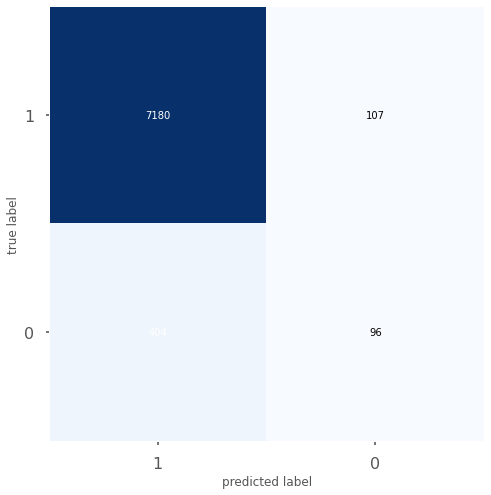

Fantasy
accuracy: 0.947348144343136 precision: 0.0 recall: 0.0 f1: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 921.6x633.6 with 0 Axes>

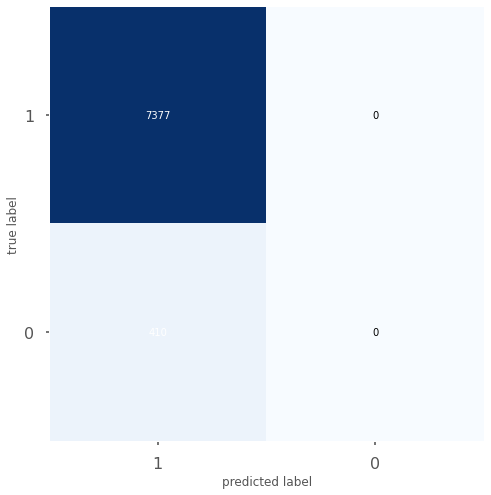

History
accuracy: 0.9660973417233851 precision: 0.0 recall: 0.0 f1: 0.0


<Figure size 921.6x633.6 with 0 Axes>

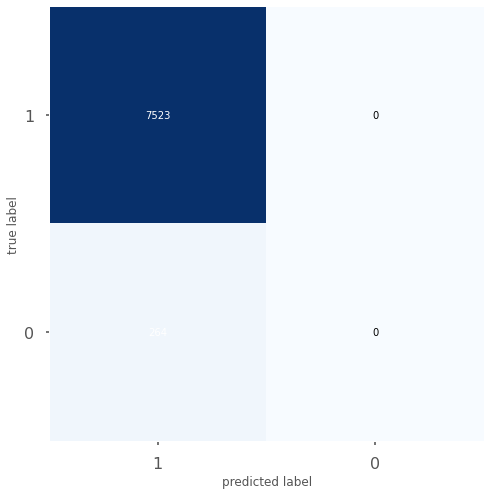

Horror
accuracy: 0.8907152947219725 precision: 0.6199095022624435 recall: 0.1515486725663717 f1: 0.24355555555555555


<Figure size 921.6x633.6 with 0 Axes>

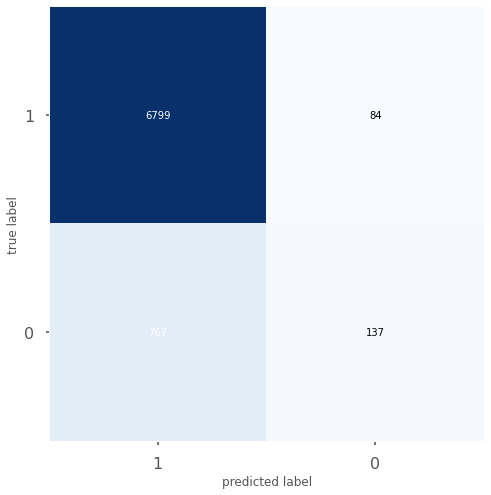

Music
accuracy: 0.9622447669192243 precision: 0.0 recall: 0.0 f1: 0.0


<Figure size 921.6x633.6 with 0 Axes>

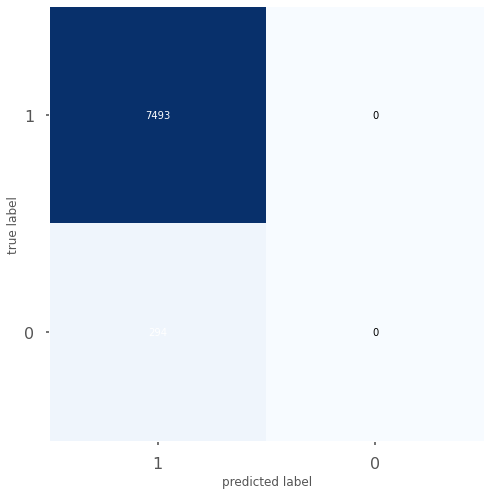

Mystery
accuracy: 0.935662000770515 precision: 0.0 recall: 0.0 f1: 0.0


<Figure size 921.6x633.6 with 0 Axes>

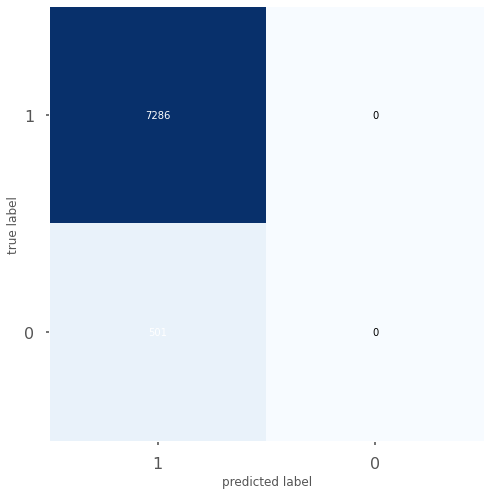

Romance
accuracy: 0.8313856427378965 precision: 0.48064085447263016 recall: 0.2803738317757009 f1: 0.3541564190850958


<Figure size 921.6x633.6 with 0 Axes>

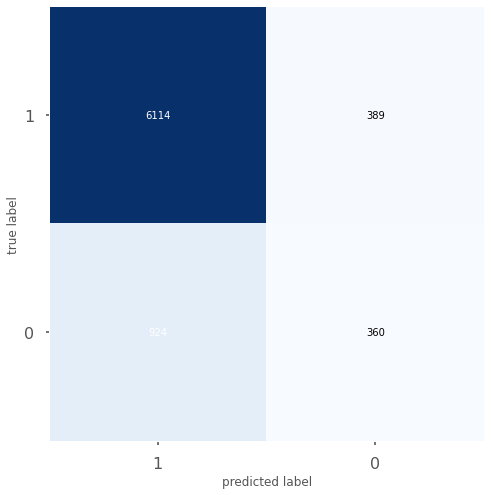

Science Fiction
accuracy: 0.9364325157313471 precision: 0.6388888888888888 recall: 0.17196261682242991 f1: 0.2709867452135493


<Figure size 921.6x633.6 with 0 Axes>

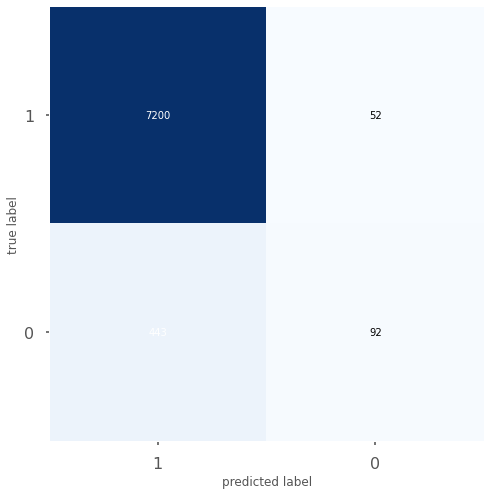

Thriller
accuracy: 0.8218826248876332 precision: 0.5851528384279476 recall: 0.18293515358361775 f1: 0.27873114924596987


<Figure size 921.6x633.6 with 0 Axes>

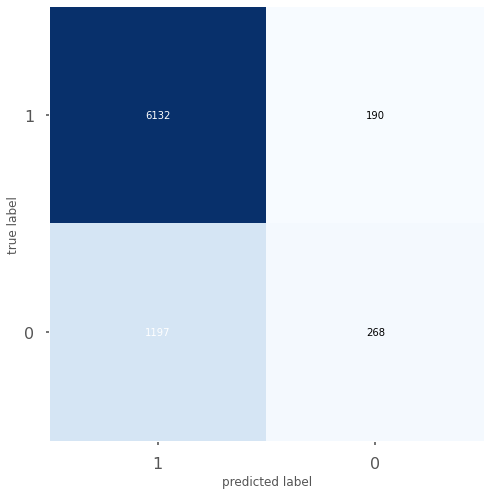

War
accuracy: 0.9676383716450494 precision: 0.5063291139240507 recall: 0.15810276679841898 f1: 0.24096385542168675


<Figure size 921.6x633.6 with 0 Axes>

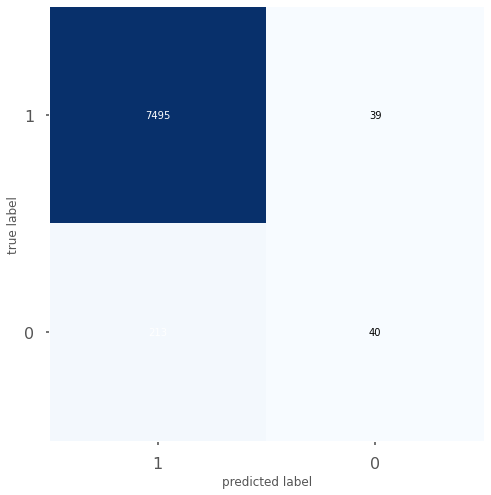

Western
accuracy: 0.9717477847694876 precision: 0.0 recall: 0.0 f1: 0.0


<Figure size 921.6x633.6 with 0 Axes>

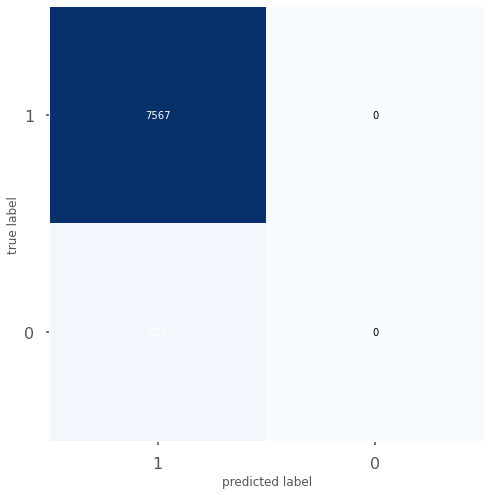

In [101]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

accuracy_per_class = []
precision_per_class = []
recall_per_class = []
f1_per_class = []
classes = list(mlb.classes_)
for i in range(labels.shape[0]):

  accuracy_per_class.append(accuracy_score(labels[i, :], preds[i, :]))
  precision_per_class.append(precision_score(labels[i, :], preds[i, :]))
  recall_per_class.append(recall_score(labels[i, :], preds[i, :]))
  f1_per_class.append(f1_score(labels[i, :], preds[i, :]))
  print(classes[i])
  print("accuracy:", accuracy_per_class[i], "precision:", precision_per_class[i],
        "recall:", recall_per_class[i], "f1:", f1_per_class[i])
  cm  = confusion_matrix(labels[i, :], preds[i, :])
  plt.figure()
  plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
  plt.xticks(range(2), ['1', '0'], fontsize=16)
  plt.yticks(range(2), ['1', '0'], fontsize=16)
  plt.show()

In [102]:
from keras.models import model_from_json

In [104]:
model_json = word2vec_model.to_json()
with open("/content/gdrive/My Drive/Movie_genre_prediction_dataset/model.json", "w") as json_file:
    json_file.write(model_json)

In [105]:
json_file = open('/content/gdrive/My Drive/Movie_genre_prediction_dataset/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [106]:
loaded_model.load_weights('/content/gdrive/My Drive/Movie_genre_prediction_dataset/base_model_word2vec_lstm.h5')

In [107]:
with open('/content/gdrive/My Drive/Movie_genre_prediction_dataset/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('/content/gdrive/My Drive/Movie_genre_prediction_dataset/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [109]:
len(tokenizer.word_index)

72858

In [111]:
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller',
       'War', 'Western'], dtype=object)

In [112]:
type(mlb.classes_)

numpy.ndarray

In [113]:
with open('/content/gdrive/My Drive/Movie_genre_prediction_dataset/mlb_class.pickle', 'wb') as handle:
    pickle.dump(mlb.classes_, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [114]:
with open('/content/gdrive/My Drive/Movie_genre_prediction_dataset/mlb_class.pickle', 'rb') as handle:
    pp = pickle.load(handle)

In [115]:
pp

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller',
       'War', 'Western'], dtype=object)